## Homework 4 Interpolation and Trapezoid Rule.

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, exp, pi, sqrt
import math

1) Find legendre polynomial that passes through these points. Plot the polynomial line along with the points.

In [2]:
def legendre_generator(xs,ys):
    nterms = len(xs)
    def legendre(x):
        s= 0;
        for ix in range(nterms):
            numerator = ys[ix]
            for inum in range(nterms):
                if inum != ix:
                    numerator *= (x - xs[inum])/(xs[ix] - xs[inum])
            s += numerator
        return s     
    return legendre

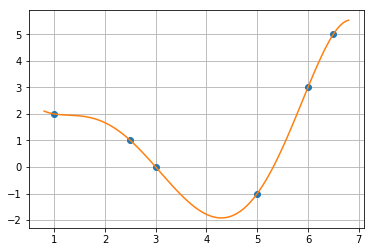

In [3]:
xs = [1,2.5, 3,  5, 6,6.5]
ys = [2,  1, 0, -1, 3,  5]
plt.plot(xs,ys,'o')

legend = legendre_generator(xs,ys)
linx = np.linspace(0.8,6.8,100)
liny = [legend(x) for x in linx]
plt.plot(linx,liny)
plt.grid()

2) Compute the following integral using trapezoid rule with 100 pieces. (Trust me, don't try to do it by hand.)
$$\int \limits_{x=0}^{x=\pi} x^2\sin(x^2)\;dx$$

In [4]:
def trapez(f,a,b,n):
    edges = np.linspace(a, b, n+1)
    h = (b-a)/n
    return (sum(f(e) for e in edges[1:-1]) + 0.5*(f(a)+f(b)))*h


In [5]:
def f(x):
    return x**2*math.sin(x**2)
ans = trapez(lambda x: f(x),0,math.pi,100)
print(ans)

1.6959516978


3) In the class, we learned how to do integral where the limit is finite. Sometimes we need to do the integral when the limit is not finite. For example, a lot of time in statistic we need to evaluate the integral of normal distribution function
$$f(t) = \frac{1}{\sqrt{\pi}} e^{-t^2}$$
from $x$ to certain point $\infty$. From statistics you will see a table for complementary error function like one you found here(see page2) http://www.geophysik.uni-muenchen.de/~malservisi/GlobaleGeophysik2/erf_tables.pdf

$$ erfc(x) = \int \limits_{t=x}^{t=\infty} \frac{2}{\sqrt{\pi}} e^{-t^2} \; dt $$

If you try to use trapezoid rule directly with this you will find that computer has problem with understanding $\infty$. Thus, we need to do a change to variable such that it turns the improper integral into a proper integral.

Remember that $\tan(\pi/2) = \infty$, if we let $$ t = \tan(u)$$ then the integral above becomes

$$ erfc(x) = \int \limits_{u=\arctan(x)}^{u=\frac{\pi}{2}} \frac{2}{\sqrt{\pi}} \frac{e^{-\tan(u)^2}}{  \cos(u)^2} \;du $$

Even though it looks much scarier than before, all the $\infty$ are gone. However, using trapezoid rule for all pieces is bad since the right end point still has $e^{-\infty}/0$; computer will scream at this.

We can avoid that trouble by first subdivide this into many pieces. Then, we use trapezoid rule for all pieces except the right most piece at $\frac{\pi}{2}$. For this piece, we can use mid-point rule $A = f((l+r)/2)h$ instead.

Your job for this problem is to find the value for $erfc(0)$, $erfc(0.5)$, $erfc(1.0)$ and $erfc(1.5)$.  Pick appropriate number of subdivisions. You should get something very close to the table.

This is actually a general techique for dealing with infinity in numerical computation: try $\tan(u)$ first. Sometimes we use sigmoid function instead because of some of its nice property, you will see some of the use in Pattern Recognition. It should be noted that there is actually a better but adhoc way to avoid imporoper integral for normal distribution but we won't go there.

In [6]:
def erfc(u):
    return (2*np.exp(-np.tan(u)**2))/(np.sqrt(np.pi)*math.cos(u)**2)

In [7]:
def trapez(f,a,b,n):
    h = (b-a)/n
    edges = np.linspace(a, b, n+1)
    return (sum(f(e) for e in edges[1:-1])+0.5*(f(a+b)))*h

In [8]:
xs = [0,0.5,1.0,1.5]
ys = [trapez(lambda x: erfc(x),np.arctan(x),np.pi/2,10000) for x in xs]

In [9]:
ys

[0.9999113773074555,
 0.47944503388621174,
 0.15729920790381571,
 0.033914214976701551]

4) In the class, you learn a bunch of tools. But, in the homework, I need you to be a little bit creative and use all you have learned to solve a seemingly random problem.

Let us consider semi-circular paper of radius 2 . The area of the whole paper is $2\pi \approx 6.28$.
We want to cut a chord(red line) from this paper such that the area of the leftover paper(shown in blue) is $4.0$. Where should I cut the chord (find the value of $x$ where the red line should be such that the area of the blue region is $4.0$? Try to get a decent answer. 

If you are good with geometry you can actually figure this one out analytically, but I want you to do it numerically using what we have learned so far.

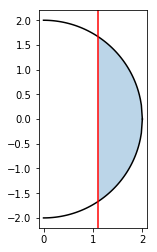

In [27]:
def circ_top(x, r=2.):
    return sqrt(r**2 - x**2)
def circ_bot(x, r=2.):
    return -sqrt(r**2 - x**2)

x=np.linspace(0,2,100)
y_top = [circ_top(xx) for xx in x]
y_bot = [circ_bot(xx) for xx in x]
ax= plt.figure(figsize=(4,4))
plt.gca().set_aspect('equal') #get current axis and set aspect ratio
plt.plot(x, y_top, 'k-')
plt.plot(x, y_bot, 'k-')
plt.axvline(1.1,color='red')
plt.fill_between(x,y_top,y_bot,where=x>1.1,alpha=0.3)

In [22]:
def trapez(f,a,b,n):
    edges = np.linspace(a, b, n+1)
    h = (b-a)/n
    return (sum(f(e) for e in edges[1:-1]) + 0.5*(f(a)+f(b)))*h
def area(x,a,b,n):
    return 2*trapez(lambda x: circ_top(x, r=2.),a,b,n)  #area of top + bot  
def find_x(xs):
    for i in xs:
        if (area(x,i,2.,1000)-4 < 0.005):
            return i
        
xx = np.linspace(0,2,1000)
ans = find_x(xx)
print("x:",ans)
print("area:",area(x,ans,2,1000)) 

x: 0.578578578579
area: 4.0015245521


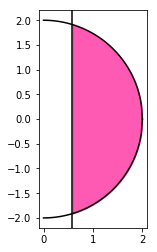

In [28]:
xs=np.linspace(0,2,100)
y_top = [circ_top(x) for x in xs]
y_bot = [circ_bot(x) for x in xs]
ax= plt.figure(figsize=(4,4))
plt.gca().set_aspect('equal') #get current axis and set aspect ratio
plt.plot(xs, y_top, 'k-')
plt.plot(xs, y_bot, 'k-')
plt.axvline(ans,color='k',)
plt.fill_between(x,y_top,y_bot,where=x>ans, color='deeppink',alpha=0.7)

### 5 Fourier Series
5) Fourier Series is one of the most useful mathematical fact in real life. You can look up wikipedia on where it gets used. The claim is quite simple. Similar to Taylor series, Fourier claims/prove that all preriodic functions can be written as a sum of sine and cosine of varying frequency. For function of period $2L$, the sum can be written as

$$f(x) = \frac{a_0}{2} + a_1 \cos(\pi \frac{x}{L}) + a_2\cos(2\pi \frac{x}{L}) + a_3 \cos(3 \pi \frac{x}{L}) + \ldots\\
+b_1 \sin(\pi \frac{x}{L}) + b_2\sin(2\pi \frac{x}{L}) + b_3 \sin(3 \pi \frac{x}{L}) + \ldots$$





Before it gets too abstract, the cell below show how similar the sawtooth function is to the sum of a few sine and cosine.

The function below is sawtooth function with period of 2(it repeats itself every length 2). Since the period is $2L$, $L=1$. That means we expect

$$sawtooth(x) \approx \frac{a_0}{2} + a_1 \cos(\pi x) + a_2\cos(2\pi x) + a_3 \cos(3 \pi x) + \ldots\\
+b_1 \sin(\pi x) + b_2\sin(2\pi x) + b_3 \sin(3 \pi x) + \ldots$$

We will learn the magical power that helps us figure out $a$'s and $b$'s later. Let us compare it with
$$magic(x) = 1 - \frac{2}{\pi}\sin(\pi x) -\frac{2}{2\pi}\sin(2\pi x) - \frac{2}{3\pi}\sin(3\pi x) - \ldots$$
which means that $a_0=2$, $\displaystyle b_i = -\frac{2}{i\pi}$ and $a_1=a_2=\ldots=0$.

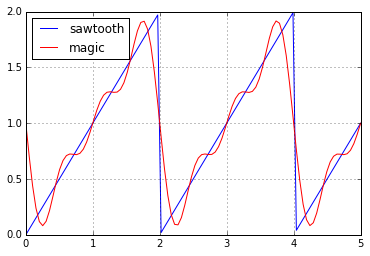

In [4]:
def sawtooth(x):
    return x%2 #only works in python. other languages will scream.

x = np.linspace(0,5,100)
y = [sawtooth(xx) for xx in x]
plt.plot(x,y,label='sawtooth')
plt.grid()

def magic(x):
    s = 0
    s += 1
    s += -2/pi*sin(pi*x) - 2/2./pi*sin(2*pi*x) - 2/3./pi*sin(3*pi*x)
    return s
magical_y = [magic(xx) for xx in x]
plt.plot(x, magical_y,'r-',label='magic')
plt.legend(loc='upper left')

Let us talk about how the magic of figuring out $a$ and $b$. We can show that

$$a_i = \frac{1}{L}\int \limits_{x=0}^{x=2L} f(x)\cos(i \pi \frac{x}{L})\; dx $$


$$b_i = \frac{1}{L}\int \limits_{x=0}^{x=2L} f(x)\sin(i \pi \frac{x}{L})\; dx $$
You can actually prove this with basic calculus. The trick is pretty neat. See http://mathworld.wolfram.com/FourierSeries.html or various youtube videos on how to prove this.

For example, in the sawtooth example above($L=1$), $b_2$ was found by using

$$ b_2 =  \int \limits_{x=0}^{x=2L} sawtooth(x)\sin(2 \pi \frac{x}{L})\; dx $$

5.1) Consider the function below. Find $a_0, a_1, a_2, a_3$ and $b_1, b_2, b_3$ and plot the fourier approximation using these terms along with the original function. Your plot should look similar to the one shown for sawtooth. Do not forget to change $L$ to appropriate value.

I recommend you writing a nice function to figure out $a$ and $b$.

(-0.1, 1.1)

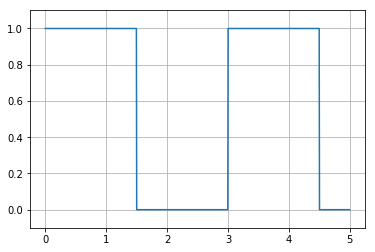

In [2]:
def step(x):
    return 0.0 if x%3>(3./2) else 1.0
x = np.linspace(0,5,1000)
y = [step(xx) for xx in x]
plt.plot(x,y,label='step')
plt.grid()
plt.ylim(-0.1,1.1)

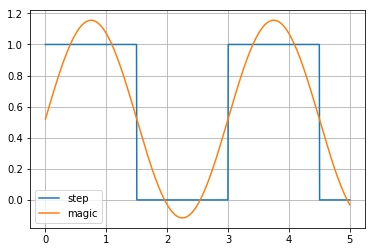

In [4]:
def trapez(f,a,b,n):
    edges = np.linspace(a, b, n+1)
    h = (b-a)/n
    return (sum(f(e) for e in edges[1:-1]) + 0.5*(f(a)+f(b)))*h

def find_a(f,i,L):
    g = lambda x: f(x)*np.cos(i*np.pi*x/L)/L 
    return trapez(g,0,2*L,100)

def find_b(f,i,L):
    g = lambda x: f(x)*np.sin(i*np.pi*x/L)/L
    return trapez(g,0,2*L,100)

def magical_step(f,i,L,x):
    terms = i+1 
    s = 0
    ai = np.array([find_a(f,t,L) for t in range(terms)])     #find a_{0} to a_{terms}
    bi = np.array([find_b(f,t,L) for t in range(1,terms)])   #find b_{1} to b_{terms}   
    s += ai[0]/2 
    s += sum([ai[i]*np.cos(i*np.pi*x/L) for i in range(1,len(ai))]) #a_{i}*cos()
    s += sum([bi[i]*np.sin((i+1)*np.pi*x/L) for i in range(len(bi))])
    return s

x = np.linspace(0,5,1000)
y = [step(xx) for xx in x]
ma_y = [magical_step(step,3,3,xx) for xx in x]
plt.plot(x,y,label='step')
plt.plot(x,ma_y,label='magic')
plt.grid()
plt.legend()

5.2) Do 5.1 but now with $a_0, a_1, \ldots, a_{10}$ and $b_1, b_2, \ldots b_{10}$

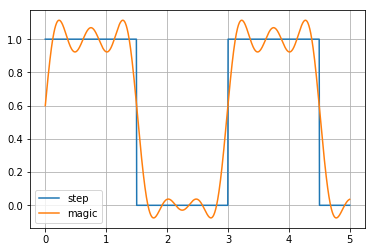

In [37]:
x = np.linspace(0,5,1000)
y = [step(xx) for xx in x]
ma_y = [magical_step(step,10,3,xx) for xx in x]
plt.plot(x,y,label='step')
plt.plot(x,ma_y,label='magic')
plt.grid()
plt.legend()

5.3) Consider the function below. Find $a_0, a_1, a_2, a_3$ and $b_1, b_2, b_3$ and plot the fourier approximation using these terms along with the original function. Your plot should look similar to the one shown for sawtooth. Do not forget to change $L$ to appropriate value.

(-0.1, 1.1)

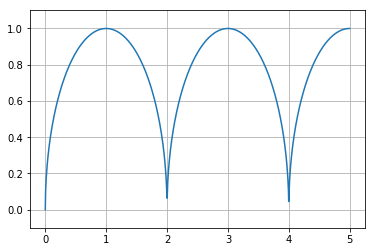

In [39]:
def circ(x):
    r = 1
    xx = (x%(2*r))
    return sqrt(r**2-(xx-r)**2)
x = np.linspace(0,5,1000)
y = [circ(xx) for xx in x]
plt.plot(x,y,label='step')
plt.grid()
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

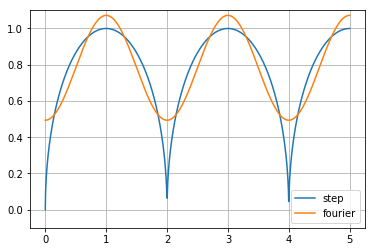

In [43]:
x = np.linspace(0,5,1000)
y = [circ(xx) for xx in x]
ma_y = [magical_step(circ,3,2,xx) for xx in x]
plt.plot(x,y,label='step')
plt.plot(x,ma_y,label='fourier')
plt.grid()
plt.legend()
plt.ylim(-0.1,1.1)

5.4) Do 5.3 but now with $a_0, a_1, \ldots, a_{10}$ and $ b_1, b_2, \ldots b_{10}$

(-0.1, 1.1)

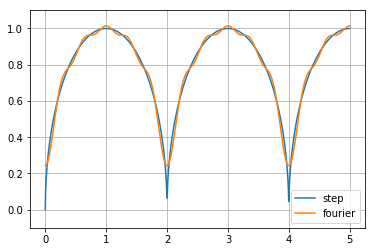

In [44]:
x = np.linspace(0,5,1000)
y = [circ(xx) for xx in x]
ma_y = [magical_step(circ,10,2,xx) for xx in x]
plt.plot(x,y,label='step')
plt.plot(x,ma_y,label='fourier')
plt.grid()
plt.legend()
plt.ylim(-0.1,1.1)

### 6 Sum of $i^k$


#### Intro

In discrete math we learn that the sum of integer from $1 \ldots n$ is given by
$$\sum_{i=1}^n i = \frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$
and
$$\sum_{i=1}^n i^2 = \frac{n^3}{3}+\frac{n^2}{2}+\frac{n}{6}$$
and
$$\sum_{i=1}^n i^3 = \left( \frac{n(n-1)}{2} \right)^2 = \frac{n^4}{4} + \ldots$$

As you may notice, one can actually show that $\displaystyle \sum_{i=1}^n i^k$ has is a polynomial of degree $k+1$.

To calculate the sum if we use for loop and calculate the left hand side it will be $O(n)$. But if we use the right hand side we can calculate it in $O(1)$. So, calculating it with a closed form is a much better approach.

But as you recall getting the close formed formula is quite difficult to do by hands. In this problem we will use legendre polynomial to find it.

#### Problem


Use what you learn about Legendre Method and write a function that takes in $n$ and $k$ and calculate $$\sum_{i=1}^n i^k$$ in $O(k)$ (*NOT* $O(n)$).

##### Warning: don't try to sum up too far as it can cause integer overflow.

In [87]:
def legendre_generator(xs,ys):
    nterms = len(xs)
    def legendre(x):
        s= 0;
        for ix in range(nterms):
            numerator = ys[ix]
            for inum in range(nterms):
                if inum != ix:
                    numerator *= (x - xs[inum])/(xs[ix] - xs[inum])
            s += numerator
        return s     
    return legendre   

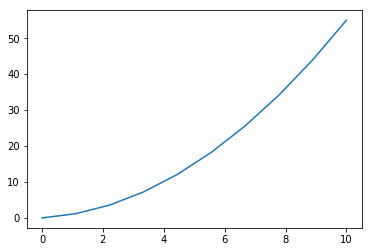

In [88]:
def sumofi(n,k):
    s = 0
    for i in range(1,n+1):
        s+=i**k
        print(s)
    return s

def sumofx(x):
    return x*(x+1)/2
# print(sumofi(10,2))
# print(sumofx(10))

xs = np.linspace(0,10,10)
ys = [sumofx(x) for x in xs]
plt.plot(xs,ys)

[1.0, 3.0]


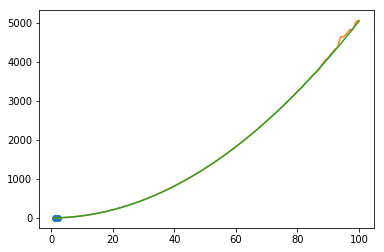

In [104]:
legendre = legendre_generator(xs,ys)

n =100
k =1
xss = np.linspace(1,k+1,k+1)
yss = []
tmp = 0
for i in xss:
    tmp+=i**k
    yss.append(tmp) 
test = [i**k]
print(yss)
plt.plot(xss,yss,"o")

lg = [legendre(x) for x in np.linspace(1,n,n+1)] 
plt.plot(np.linspace(1,n,n+1),lg)


xs = np.linspace(1,n,n+1)
ys = [sumofx(x) for x in xs]
plt.plot(xs,ys)



25502500.0


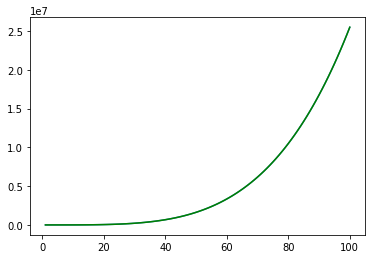

In [103]:
def sumLegendre(n,k):
    poins = np.linspace(1,k+2,k+2) # O(k) k+2 points k+1 degrees  
    tmp = 0
    ys=[]
    for i in points:
        tmp+=i**k
        ys.append(tmp) 
    leg = legendre_generator(xs,ys)
    return leg(n)


print(sumLegendre(100,3))
space = np.linspace(1,100,100)
nsum = [sumLegendre(i,3)for i in space]
plt.plot(space,nsum)

rsum = []
tmp = 0
for i in space:
    tmp+=i**3
    rsum.append(tmp)
plt.plot(space,rsum,color="green")